In [3]:
from sklearn.datasets import make_moons
import numpy as np
import os
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import tensorflow as tf
m = 1000
X_moons, y_moons = make_moons(m, noise=0.1, random_state=42)

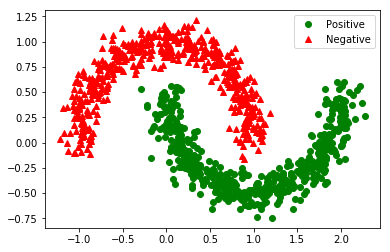

In [4]:
plt.plot(X_moons[y_moons == 1, 0], X_moons[y_moons == 1, 1], 'go', label="Positive")
plt.plot(X_moons[y_moons == 0, 0], X_moons[y_moons == 0, 1], 'r^', label="Negative")
plt.legend()
plt.show()

In [5]:
X_moons_with_bias = np.c_[np.ones((m, 1)), X_moons]

In [7]:
X_moons_with_bias

array([[ 1.        , -0.05146968,  0.44419863],
       [ 1.        ,  1.03201691, -0.41974116],
       [ 1.        ,  0.86789186, -0.25482711],
       ..., 
       [ 1.        ,  1.68425911, -0.34822268],
       [ 1.        , -0.9672013 ,  0.26367208],
       [ 1.        ,  0.78758971,  0.61660945]])

In [8]:
X_moons

array([[-0.05146968,  0.44419863],
       [ 1.03201691, -0.41974116],
       [ 0.86789186, -0.25482711],
       ..., 
       [ 1.68425911, -0.34822268],
       [-0.9672013 ,  0.26367208],
       [ 0.78758971,  0.61660945]])

In [9]:
y_moons_column_vector = y_moons.reshape(-1, 1)

In [11]:
test_ratio = 0.2
test_size = int(m * test_ratio)
X_train = X_moons_with_bias[:-test_size]
X_test = X_moons_with_bias[-test_size:]
y_train = y_moons_column_vector[:-test_size]
y_test = y_moons_column_vector[-test_size:]

In [12]:
def random_batch(X_train, y_train, batch_size):
    rnd_indices = np.random.randint(0, len(X_train), batch_size)
    X_batch = X_train[rnd_indices]
    y_batch = y_train[rnd_indices]
    return X_batch, y_batch

In [13]:
X_batch, y_batch = random_batch(X_train, y_train, 5)
X_batch

array([[ 1.        , -0.0140608 ,  0.14500789],
       [ 1.        ,  0.56940582, -0.3832113 ],
       [ 1.        ,  0.23677055,  0.96997974],
       [ 1.        ,  1.75826721,  0.07732943],
       [ 1.        ,  1.27029447, -0.60951736]])

In [14]:
y_batch

array([[1],
       [1],
       [0],
       [1],
       [1]], dtype=int64)

In [16]:
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)
reset_graph()

In [17]:
n_inputs = 2

In [18]:
X = tf.placeholder(tf.float32, shape=(None, n_inputs + 1), name="X")
y = tf.placeholder(tf.float32, shape=(None, 1), name="y")
theta = tf.Variable(tf.random_uniform([n_inputs + 1, 1], -1.0, 1.0, seed=42), name="theta")
logits = tf.matmul(X, theta, name="logits")
y_proba = 1 / (1 + tf.exp(-logits))

In [19]:
y_proba = tf.sigmoid(logits)

In [21]:
loss = tf.losses.log_loss(y, y_proba)  # uses epsilon = 1e-7 by default

In [22]:
learning_rate = 0.01
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(loss)

In [23]:
init = tf.global_variables_initializer()

In [24]:
n_epochs = 1000
batch_size = 50
n_batches = int(np.ceil(m / batch_size))

with tf.Session() as sess:
    sess.run(init)

    for epoch in range(n_epochs):
        for batch_index in range(n_batches):
            X_batch, y_batch = random_batch(X_train, y_train, batch_size)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        loss_val = loss.eval({X: X_test, y: y_test})
        if epoch % 100 == 0:
            print("Epoch:", epoch, "\tLoss:", loss_val)

    y_proba_val = y_proba.eval(feed_dict={X: X_test, y: y_test})

Epoch: 0 	Loss: 0.792602
Epoch: 100 	Loss: 0.343463
Epoch: 200 	Loss: 0.30754
Epoch: 300 	Loss: 0.292889
Epoch: 400 	Loss: 0.285336
Epoch: 500 	Loss: 0.280478
Epoch: 600 	Loss: 0.278083
Epoch: 700 	Loss: 0.276154
Epoch: 800 	Loss: 0.27552
Epoch: 900 	Loss: 0.274912


In [25]:
y_proba_val[:5]

array([[ 0.54895616],
       [ 0.70724374],
       [ 0.51900256],
       [ 0.9911136 ],
       [ 0.50859052]], dtype=float32)

In [29]:
y_pred = (y_proba_val >= 0.5)
y_pred[:5]

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True]], dtype=bool)

In [30]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_test, y_pred)

0.86274509803921573

In [31]:
recall_score(y_test, y_pred)

0.88888888888888884

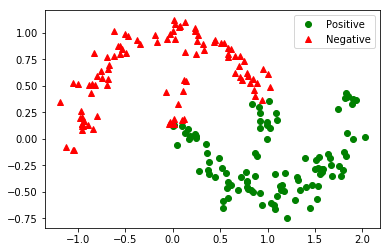

In [32]:
y_pred_idx = y_pred.reshape(-1) # a 1D array rather than a column vector
plt.plot(X_test[y_pred_idx, 1], X_test[y_pred_idx, 2], 'go', label="Positive")
plt.plot(X_test[~y_pred_idx, 1], X_test[~y_pred_idx, 2], 'r^', label="Negative")
plt.legend()
plt.show()

In [33]:
X_train_enhanced = np.c_[X_train,
                         np.square(X_train[:, 1]),
                         np.square(X_train[:, 2]),
                         X_train[:, 1] ** 3,
                         X_train[:, 2] ** 3]
X_test_enhanced = np.c_[X_test,
                        np.square(X_test[:, 1]),
                        np.square(X_test[:, 2]),
                        X_test[:, 1] ** 3,
                        X_test[:, 2] ** 3]

In [34]:
X_train_enhanced[:5]

array([[  1.00000000e+00,  -5.14696757e-02,   4.44198631e-01,
          2.64912752e-03,   1.97312424e-01,  -1.36349734e-04,
          8.76459084e-02],
       [  1.00000000e+00,   1.03201691e+00,  -4.19741157e-01,
          1.06505890e+00,   1.76182639e-01,   1.09915879e+00,
         -7.39511049e-02],
       [  1.00000000e+00,   8.67891864e-01,  -2.54827114e-01,
          7.53236288e-01,   6.49368582e-02,   6.53727646e-01,
         -1.65476722e-02],
       [  1.00000000e+00,   2.88850997e-01,  -4.48668621e-01,
          8.34348982e-02,   2.01303531e-01,   2.41002535e-02,
         -9.03185778e-02],
       [  1.00000000e+00,  -8.33439108e-01,   5.35056649e-01,
          6.94620746e-01,   2.86285618e-01,  -5.78924095e-01,
          1.53179024e-01]])

In [35]:
reset_graph()

In [36]:
def logistic_regression(X, y, initializer=None, seed=42, learning_rate=0.01):
    n_inputs_including_bias = int(X.get_shape()[1])
    with tf.name_scope("logistic_regression"):
        with tf.name_scope("model"):
            if initializer is None:
                initializer = tf.random_uniform([n_inputs_including_bias, 1], -1.0, 1.0, seed=seed)
            theta = tf.Variable(initializer, name="theta")
            logits = tf.matmul(X, theta, name="logits")
            y_proba = tf.sigmoid(logits)
        with tf.name_scope("train"):
            loss = tf.losses.log_loss(y, y_proba, scope="loss")
            optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
            training_op = optimizer.minimize(loss)
            loss_summary = tf.summary.scalar('log_loss', loss)
        with tf.name_scope("init"):
            init = tf.global_variables_initializer()
        with tf.name_scope("save"):
            saver = tf.train.Saver()
    return y_proba, loss, training_op, loss_summary, init, saver

In [37]:
from datetime import datetime

def log_dir(prefix=""):
    now = datetime.utcnow().strftime("%Y%m%d%H%M%S")
    root_logdir = "tf_logs"
    if prefix:
        prefix += "-"
    name = prefix + "run-" + now
    return "{}/{}/".format(root_logdir, name)

In [38]:
n_inputs = 2 + 4
logdir = log_dir("logreg")

X = tf.placeholder(tf.float32, shape=(None, n_inputs + 1), name="X")
y = tf.placeholder(tf.float32, shape=(None, 1), name="y")

y_proba, loss, training_op, loss_summary, init, saver = logistic_regression(X, y)

file_writer = tf.summary.FileWriter(logdir, tf.get_default_graph())

In [39]:
n_epochs = 10001
batch_size = 50
n_batches = int(np.ceil(m / batch_size))

checkpoint_path = "/tmp/my_logreg_model.ckpt"
checkpoint_epoch_path = checkpoint_path + ".epoch"
final_model_path = "./my_logreg_model"

with tf.Session() as sess:
    if os.path.isfile(checkpoint_epoch_path):
        # if the checkpoint file exists, restore the model and load the epoch number
        with open(checkpoint_epoch_path, "rb") as f:
            start_epoch = int(f.read())
        print("Training was interrupted. Continuing at epoch", start_epoch)
        saver.restore(sess, checkpoint_path)
    else:
        start_epoch = 0
        sess.run(init)

    for epoch in range(start_epoch, n_epochs):
        for batch_index in range(n_batches):
            X_batch, y_batch = random_batch(X_train_enhanced, y_train, batch_size)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        loss_val, summary_str = sess.run([loss, loss_summary], feed_dict={X: X_test_enhanced, y: y_test})
        file_writer.add_summary(summary_str, epoch)
        if epoch % 500 == 0:
            print("Epoch:", epoch, "\tLoss:", loss_val)
            saver.save(sess, checkpoint_path)
            with open(checkpoint_epoch_path, "wb") as f:
                f.write(b"%d" % (epoch + 1))

    saver.save(sess, final_model_path)
    y_proba_val = y_proba.eval(feed_dict={X: X_test_enhanced, y: y_test})
    os.remove(checkpoint_epoch_path)

Epoch: 0 	Loss: 0.629985
Epoch: 500 	Loss: 0.161224
Epoch: 1000 	Loss: 0.119032
Epoch: 1500 	Loss: 0.0973292
Epoch: 2000 	Loss: 0.0836979
Epoch: 2500 	Loss: 0.0743758
Epoch: 3000 	Loss: 0.0675021
Epoch: 3500 	Loss: 0.0622069
Epoch: 4000 	Loss: 0.0580268
Epoch: 4500 	Loss: 0.054563
Epoch: 5000 	Loss: 0.0517083
Epoch: 5500 	Loss: 0.0492377
Epoch: 6000 	Loss: 0.0471673
Epoch: 6500 	Loss: 0.0453766
Epoch: 7000 	Loss: 0.0438187
Epoch: 7500 	Loss: 0.0423742
Epoch: 8000 	Loss: 0.0410892
Epoch: 8500 	Loss: 0.0399709
Epoch: 9000 	Loss: 0.0389202
Epoch: 9500 	Loss: 0.0380107
Epoch: 10000 	Loss: 0.0371557


In [40]:
y_pred = (y_proba_val >= 0.5)

In [41]:
precision_score(y_test, y_pred)

0.97979797979797978

In [42]:
recall_score(y_test, y_pred)

0.97979797979797978

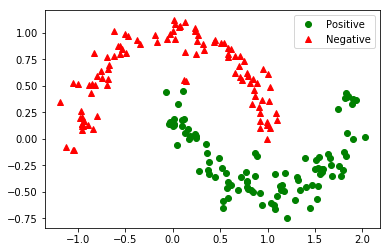

In [43]:
y_pred_idx = y_pred.reshape(-1) # a 1D array rather than a column vector
plt.plot(X_test[y_pred_idx, 1], X_test[y_pred_idx, 2], 'go', label="Positive")
plt.plot(X_test[~y_pred_idx, 1], X_test[~y_pred_idx, 2], 'r^', label="Negative")
plt.legend()
plt.show()